In [39]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

In [41]:
# download mnist data
mnist=fetch_openml("mnist_784",version=1)
mnist.keys()
X,y=mnist["data"],mnist["target"] #hold INPUT and OUTPUT
print(X.shape)
print(X.iloc[0:10,0:10])

(70000, 784)
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       0       0       0       0       0       0       0       0       0   
7       0       0       0       0       0       0       0       0       0   
8       0       0       0       0       0       0       0       0       0   
9       0       0       0       0       0       0       0       0       0   

   pixel10  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        0  
9        

In [75]:
#split data into train 
X_train=X[:60000] 
y_train=y[:60000]


In [77]:
## Normalize pixel values
X_train = X_train / 255.0
# transform datafram into array to solve problem of reshape
X_train=np.array(X_train)


In [141]:
#use PCA TO dimensionality reduction
pca=PCA(n_components=X_train.shape[1]) # # Max components في الاول انا عاوز اشوف الجراف ال هحدد عليه miss data
x_train_pca=pca.fit_transform(X_train) #fit for data,compress for data


In [143]:
explained_variance = np.cumsum(pca.explained_variance_ratio_) # Explained variance ratio
n_components_95 = np.argmax(explained_variance >= 0.95) + 1  # Add 1 for 1-based indexing


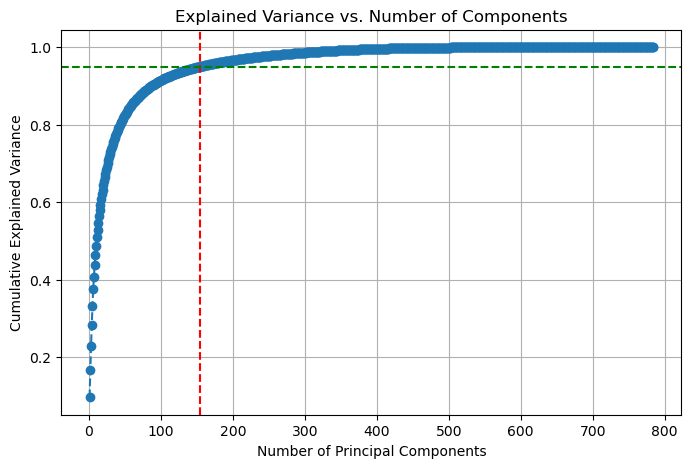

Number of components needed to retain 95% variance: 154


In [145]:
# Plot explained variance vs. number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, X_train.shape[1] + 1), explained_variance, marker='o', linestyle='--')
# Mark the elbow point at 95% variance
plt.axvline(x=n_components_95, color='r', linestyle='--', label=f"Elbow at {n_components_95} PCs")
plt.axhline(y=0.95, color='g', linestyle='--', label="95% Variance Threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()
print(f"Number of components needed to retain 95% variance: {n_components_95}")
# Plot original vs. reconstructed images

In [147]:
# Flatten images (28x28 → 784)
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Ensure it's correctly shaped

# Apply PCA to retain 95% variance
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_flat)
print("X_train_pca",X_train_pca)
# Reconstruct the images from compressed representation
X_train_reconstructed = pca.inverse_transform(X_train_pca)
print("X_train_reconstructed",X_train_reconstructed)
# Reshape back to original image size (28,28)
X_train_reconstructed = X_train_reconstructed.reshape(-1, 28, 28)


X_train_pca [[ 0.48601015  1.22617358  0.09613354 ...  0.21576078  0.07875794
   0.15525471]
 [ 3.96752304  1.15630211 -2.33858651 ...  0.02839725  0.04885415
  -0.04997345]
 [-0.2033318  -1.53793393  0.73925392 ... -0.21253264 -0.19011685
  -0.28736574]
 ...
 [-0.69824882 -0.62775769  1.01024738 ...  0.21782296 -0.34509347
  -0.02270509]
 [ 0.51218067  0.02192916 -2.01513205 ...  0.09140531 -0.01985246
  -0.25594218]
 [-0.68014099  0.09693648 -2.18046625 ...  0.20586513 -0.04953695
  -0.1793726 ]]
X_train_reconstructed [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


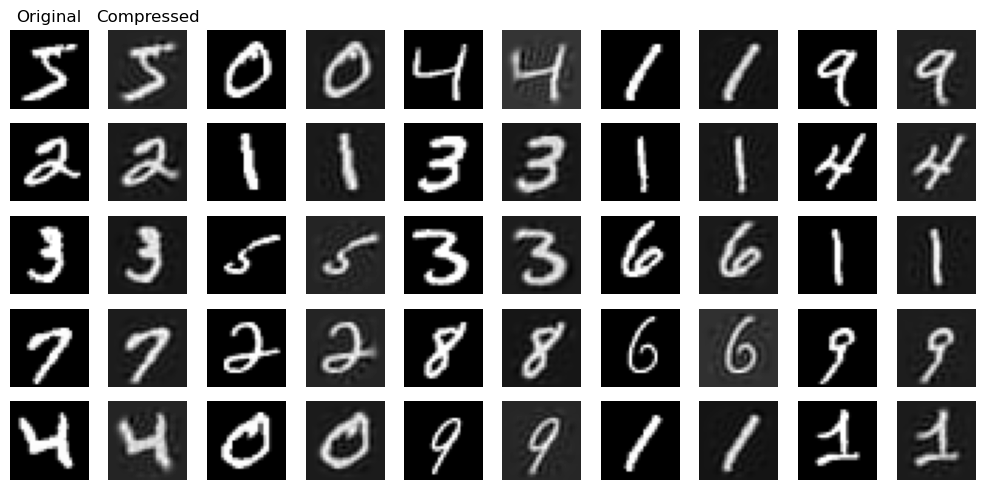

Original dimension: 784
Reduced dimension: 154 (after PCA)


In [149]:
# Plot grid of images
n_rows, n_cols = 5, 5  # Grid size (5x5)
fig, axes = plt.subplots(n_rows, n_cols * 2, figsize=(10, 5))

for i in range(n_rows):
    for j in range(n_cols):
        idx = i * n_cols + j  # Image index

        # Original image
        axes[i, j * 2].imshow(X_train[idx].reshape(28, 28), cmap="gray")  # Ensure 2D shape
        axes[i, j * 2].axis("off")

        # Compressed (PCA-reconstructed) image
        axes[i, j * 2 + 1].imshow(X_train_reconstructed[idx], cmap="gray")  # Already 2D
        axes[i, j * 2 + 1].axis("off")

# Set titles
axes[0, 0].set_title("Original", fontsize=12)
axes[0, 1].set_title("Compressed", fontsize=12)

plt.tight_layout()
plt.show()

# Print reduced dimension
print(f"Original dimension: {X_train_flat.shape[1]}")
print(f"Reduced dimension: {X_train_pca.shape[1]} (after PCA)")

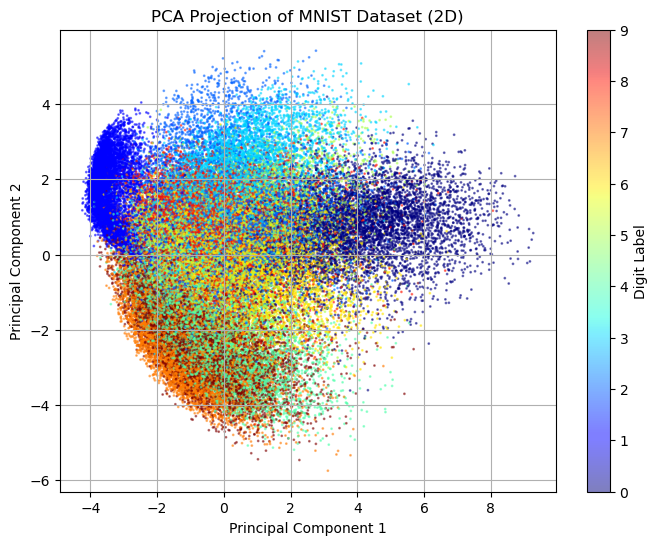

In [151]:
# Scatter plot of PCA components (projected 2D space)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=np.array(y_train, dtype=np.int32), cmap='jet', alpha=0.5, s=1)
plt.colorbar(scatter, label="Digit Label")
plt.title("PCA Projection of MNIST Dataset (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

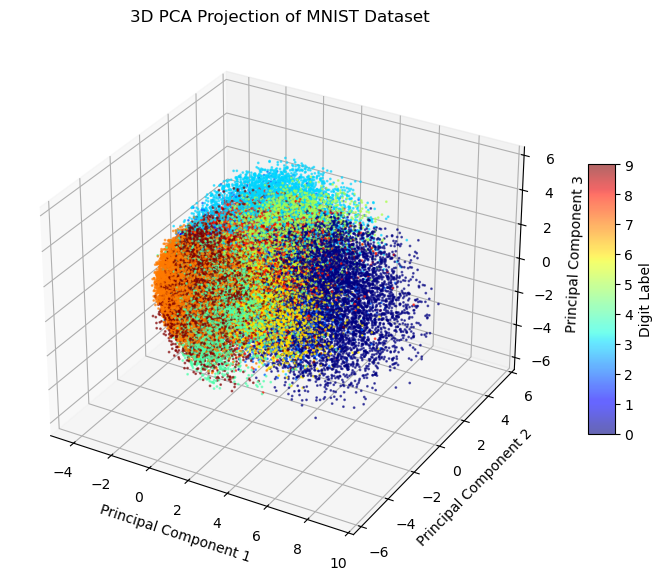

In [152]:
# Apply PCA (reduce to 3D for visualization)
pca = PCA(n_components=3,svd_solver="randomized")
x_train_pca = pca.fit_transform(X_train_flat)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data with different colors for each digit
scatter = ax.scatter(
    x_train_pca[:, 0], x_train_pca[:, 1], x_train_pca[:, 2], 
    c=np.array(y_train, dtype=np.int32), cmap='jet', alpha=0.6, s=1
)

# Labels and title
ax.set_title("3D PCA Projection of MNIST Dataset")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

# Add color bar
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Digit Label")

plt.show()